In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
import yfinance as yf

# Getting Bitcoin Prices with API from YahooFinance

In [2]:
df = yf.download("BTC-USD", start="2015-01-01", end="2019-12-31", interval = "1d")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


# Cleaning and Preprocessing Data

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

len(df)

1826

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1826 non-null   float64
 1   High       1826 non-null   float64
 2   Low        1826 non-null   float64
 3   Close      1826 non-null   float64
 4   Adj Close  1826 non-null   float64
 5   Volume     1826 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [5]:
df['Daily_Bitcoin_Price'] = df['Close']

In [6]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_Bitcoin_Price  1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [8]:
df.isnull().sum()

Daily_Bitcoin_Price    0
dtype: int64

In [9]:
df.to_csv('Daily_Bitcoin_Prices')           #datetime is lost on csv file

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_Bitcoin_Price  1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [11]:
df.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999


# Visualizing the Bitcoin Price data - Daily prices from 2015 through 2019

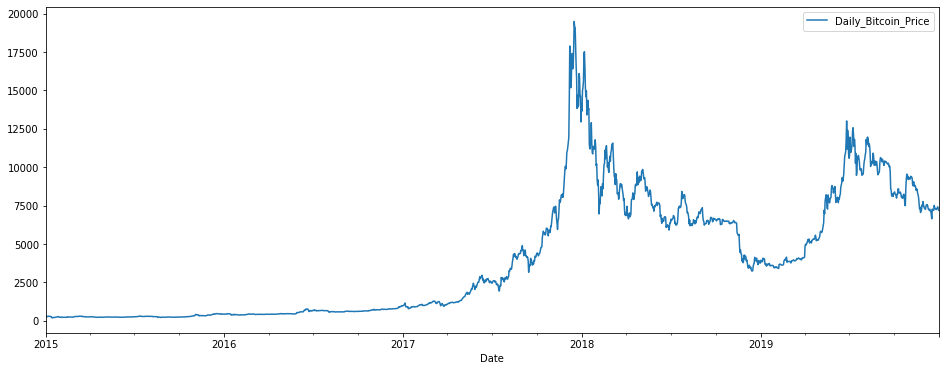

In [12]:
df.plot(figsize = (16,6))

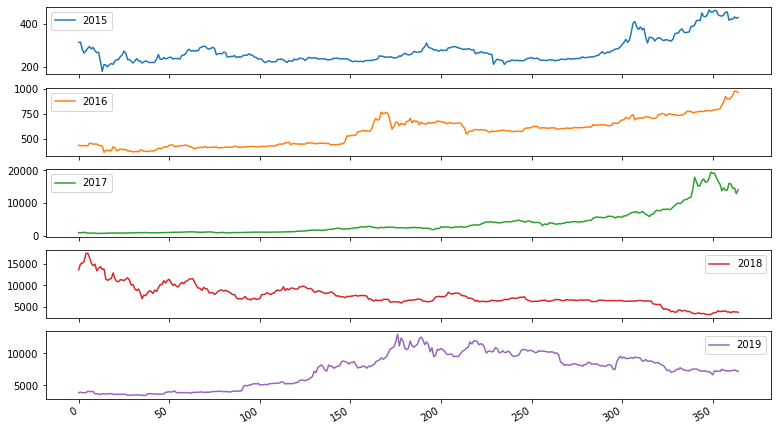

In [13]:
# Use pandas grouper to group values using annual frequency                     #Are there any yearly patterns?
year_groups = df.groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns 
df_annual = pd.DataFrame()

for yr, group in year_groups:
    df_annual[yr.year] = pd.Series(group.values.ravel())      #needed to add pd.Series to fix error
    
# Plot the yearly groups as subplots
df_annual.plot(figsize = (13,8), subplots=True, legend=True);

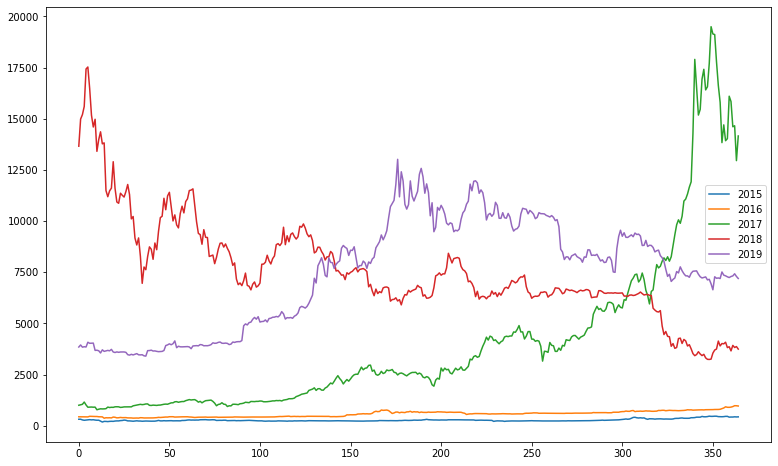

In [14]:
# Plot overlapping yearly groups, does not show any annual patterns
for yr, group in year_groups:
    df_annual[yr.year] = pd.Series(group.values.ravel())     
    
df_annual.plot(figsize = (13,8), subplots=False, legend=True);

In [15]:
roll_mean = df.rolling(window=8, center=False).mean()  #Graph is exponential, I'll test for it using rolling statists
roll_std = df.rolling(window=8, center=False).std()

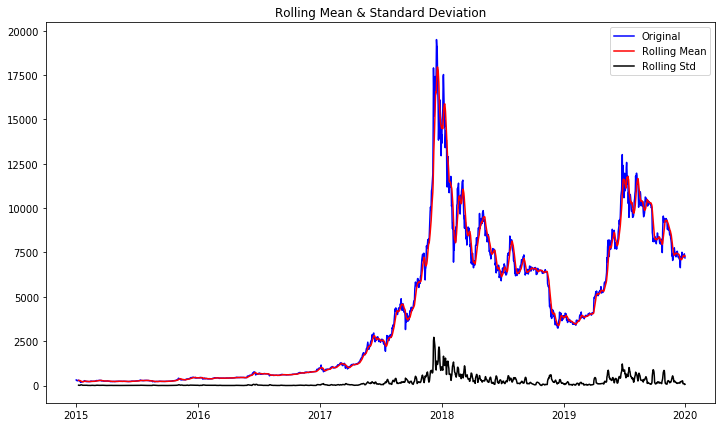

In [16]:
fig = plt.figure(figsize=(12,7))
plt.plot(df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Bitcoin has an exponential upward trend and an increase in variance 

# Time Series Decomposition

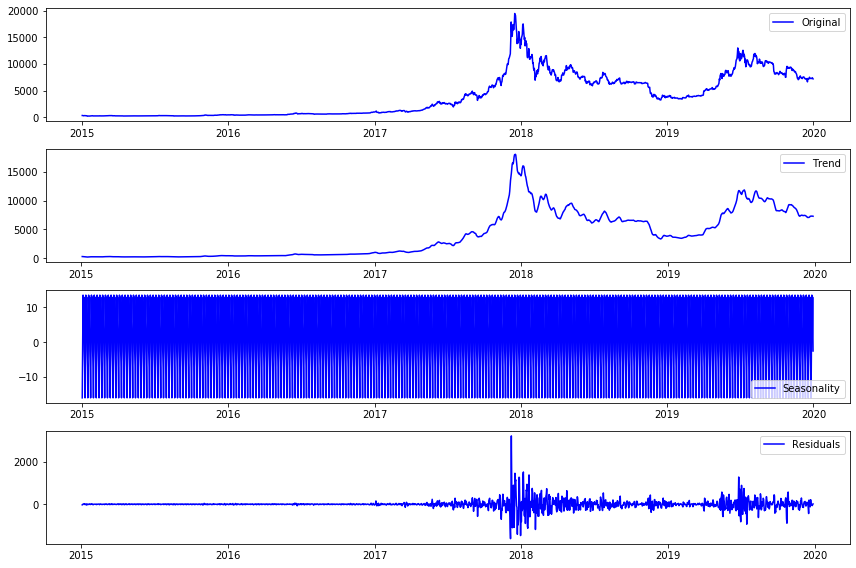

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c020d0>]],
      dtype=object)

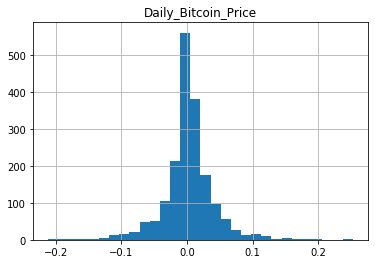

In [18]:
df_pct = df.pct_change()     #distribution of daily returns
df_pct.hist(bins=30)

# Taking logs to make Bitcoin prices stationary

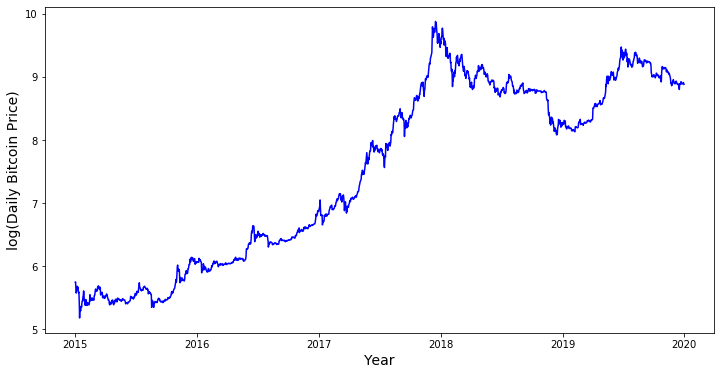

In [19]:
df_log = pd.Series(np.log(df['Daily_Bitcoin_Price']))        #taking the log to create stationary data
fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('log(Daily Bitcoin Price)', fontsize=14)
plt.show()

After taking the log transformation, there is still an exponential trend

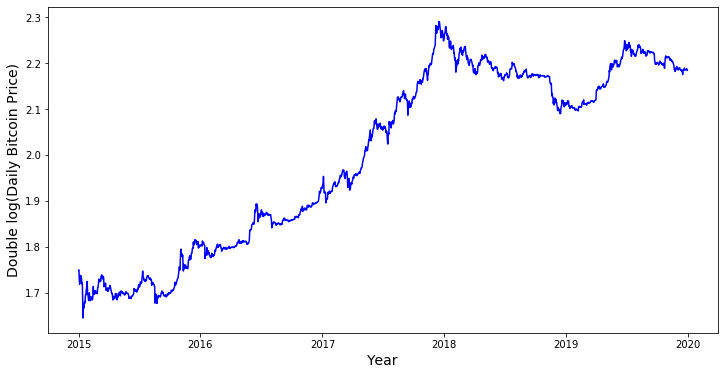

In [20]:
df_log2 = pd.Series(np.log(np.log(df['Daily_Bitcoin_Price'])))     #taking 2 logs to create stationary data
fig = plt.figure(figsize=(12,6))
plt.plot(df_log2, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Double log(Daily Bitcoin Price)', fontsize=14)
plt.show()

After taking 2 log transformations, it looks more like an upward linear trend

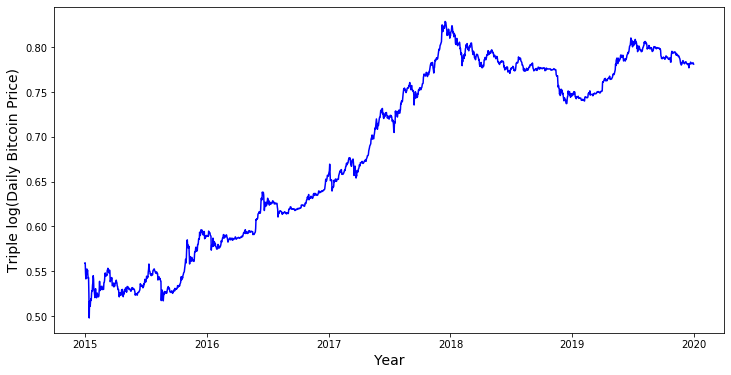

In [21]:
df_log3 = pd.Series(np.log(np.log(np.log(df['Daily_Bitcoin_Price']))))    #taking 3 logs to create stationary data
fig = plt.figure(figsize=(12,6))
plt.plot(df_log3, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Triple log(Daily Bitcoin Price)', fontsize=14)
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller                           #The Dickey-Fuller Test

dftest_log3 = adfuller(df_log3)

# Extract and display test results in a user friendly manner
dfoutput_log3 = pd.Series(dftest_log3[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_log3[4].items():
    dfoutput_log3['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_log3)

Results of Dickey-Fuller test: 

Test Statistic                   -1.118985
p-value                           0.707442
#Lags Used                       10.000000
Number of Observations Used    1815.000000
Critical Value (1%)              -3.433958
Critical Value (5%)              -2.863134
Critical Value (10%)             -2.567618
dtype: float64


p-value of .70 is greater than .05, so we cannot reject the null, the data is not stationary.

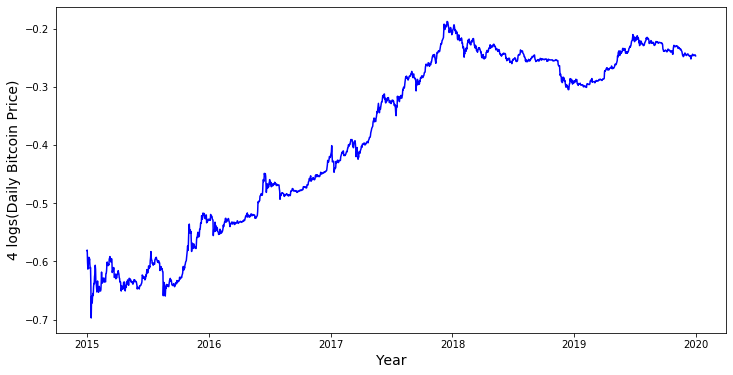

In [23]:
df_log4 = pd.Series(np.log(np.log(np.log(np.log(df['Daily_Bitcoin_Price']))))) 
fig = plt.figure(figsize=(12,6))                                     #taking 4 logs to create stationary data
plt.plot(df_log4, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('4 logs(Daily Bitcoin Price)', fontsize=14)
plt.show()

Taking 4 logs doesn't make sense! Taking 3 logs is the limit. The input prices into the 4th log are between 0 and 1. When numbers between 0 and 1 are fed into a log function, negative numbers are the result. We cannot have negative Bitcoin prices! This is true when thinking about a logrithmic graph. Let's see if taking roots helps to make our data stationary.

# Taking roots to make Bitcoin prices stationary

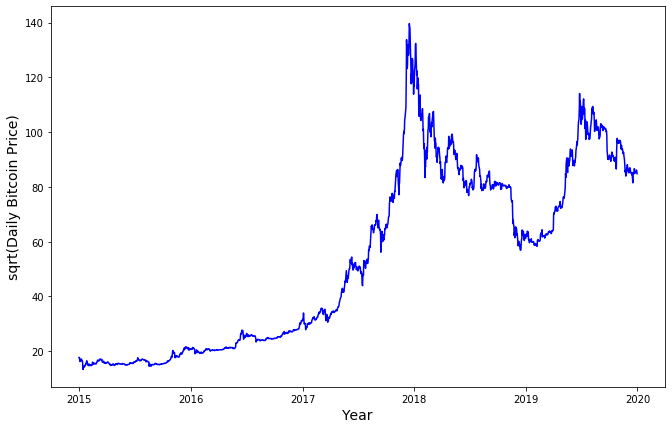

In [24]:
df_sq = pd.Series(np.sqrt(df['Daily_Bitcoin_Price']))    #Checking to see how taking the sq_root compares to 
fig = plt.figure(figsize=(11,7))                            #the log transformation
plt.plot(df_sq, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('sqrt(Daily Bitcoin Price)', fontsize=14)
plt.show()

Taking the square root does not seem to help with the exponential trend

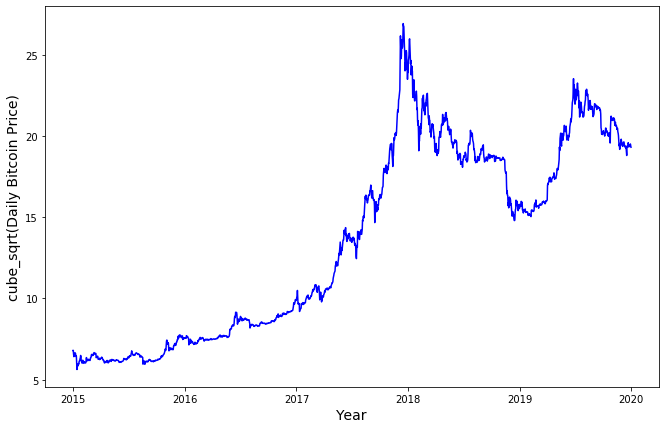

In [25]:
df_cbrt = pd.Series(np.cbrt(df['Daily_Bitcoin_Price']))    #Checking to see how taking the cube_root compares to 
fig = plt.figure(figsize=(11,7))                            #the log transformation
plt.plot(df_cbrt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('cube_sqrt(Daily Bitcoin Price)', fontsize=14)
plt.show()

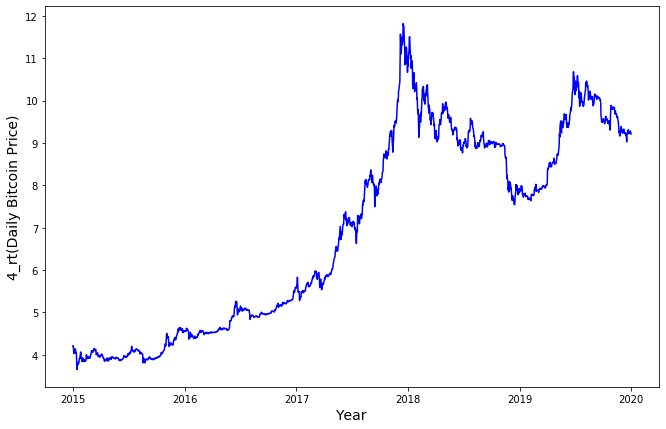

In [26]:
df_4_rt = pd.Series((df['Daily_Bitcoin_Price'])**(1/4))    #Checking to see how taking the 4th_root compares to 
fig = plt.figure(figsize=(11,7))                            #the log transformation
plt.plot(df_4_rt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('4_rt(Daily Bitcoin Price)', fontsize=14)
plt.show()

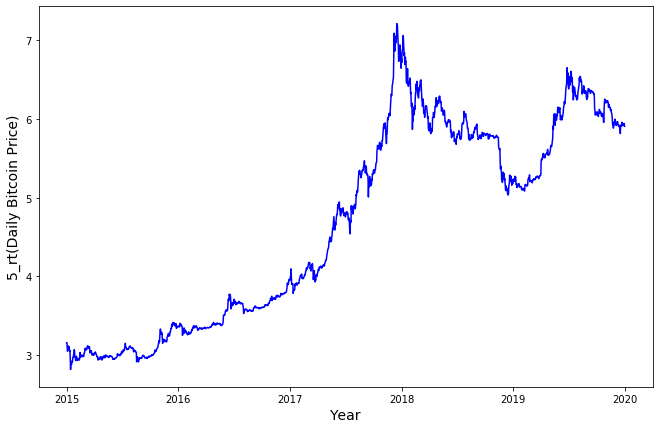

In [27]:
df_5_rt = pd.Series((df['Daily_Bitcoin_Price'])**(1/5))    #Checking to see how taking the 5th_root compares to 
fig = plt.figure(figsize=(11,7))                            #the log transformation
plt.plot(df_5_rt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('5_rt(Daily Bitcoin Price)', fontsize=14)
plt.show()

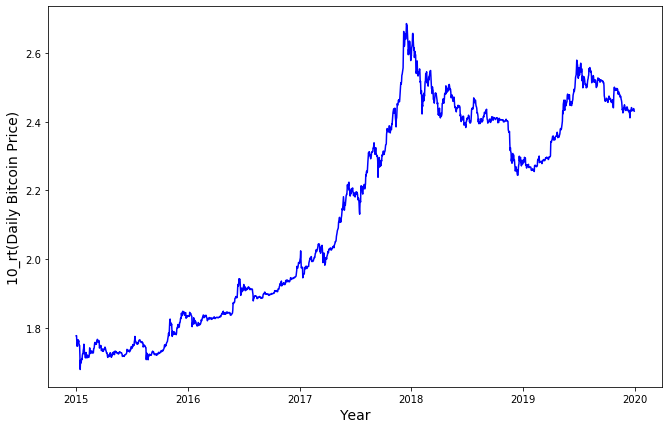

In [28]:
df_10_rt = pd.Series((df['Daily_Bitcoin_Price'])**(1/10))    #Checking to see how taking the 10th_root compares to 
fig = plt.figure(figsize=(11,7))                            #the log transformation
plt.plot(df_10_rt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('10_rt(Daily Bitcoin Price)', fontsize=14)
plt.show()

Taking roots doesn't seem to impact the exponential trend either.

In [29]:
dftest_10_rt = adfuller(df_10_rt)          #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput_10_rt = pd.Series(dftest_10_rt[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_10_rt[4].items():
    dfoutput_10_rt['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_10_rt)

Results of Dickey-Fuller test: 

Test Statistic                   -0.832624
p-value                           0.809351
#Lags Used                        0.000000
Number of Observations Used    1825.000000
Critical Value (1%)              -3.433938
Critical Value (5%)              -2.863125
Critical Value (10%)             -2.567614
dtype: float64


p-value of .80 is greater than .05, so we cannot reject the null, the data is not stationary.

Just taking logs or roots cannot make Bitcoin prices stationary

# Subtracting the rolling mean

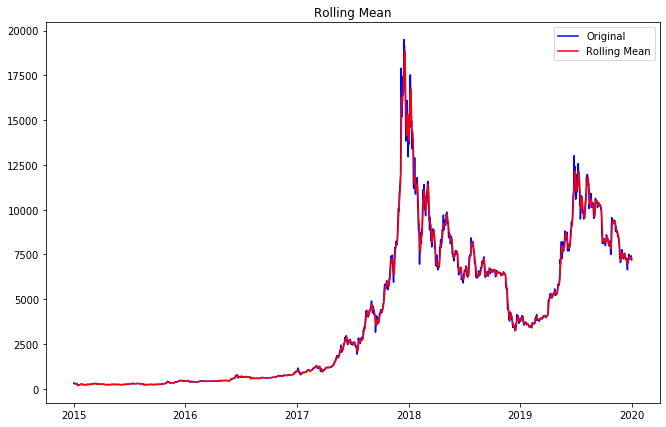

In [30]:
roll_mean = df.rolling(window=4).mean()                      #Rolling mean taking 4 previous prices
fig = plt.figure(figsize=(11,7))
plt.plot(df, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

In [31]:
df_minus_roll_mean = df - roll_mean
df_minus_roll_mean.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,-29.444496
2015-01-05,-9.221756


In [32]:
# Drop the missing values from time series calculated above
df_minus_roll_mean.dropna(inplace=True)
df_minus_roll_mean.head()

,Daily_Bitcoin_Price
Date,
2015-01-04,-29.444496
2015-01-05,-9.221756
2015-01-06,9.703995
2015-01-07,14.538254
2015-01-08,-1.238251


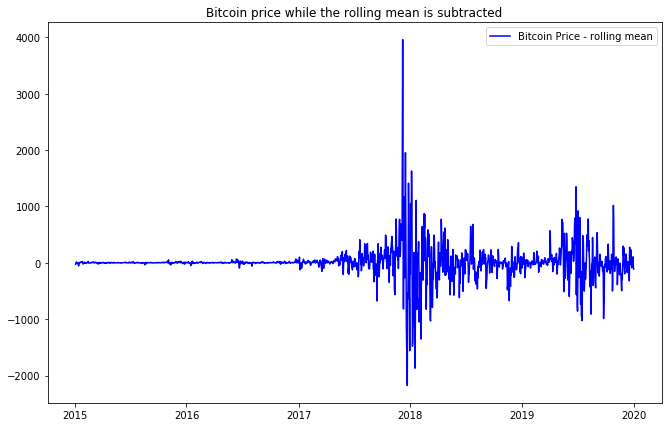

In [33]:
fig = plt.figure(figsize=(11,7))
plt.plot(df_minus_roll_mean, color='blue',label='Bitcoin Price - rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin price while the rolling mean is subtracted')
plt.show(block=False)

In [34]:
dftest_minus_roll_mean = adfuller(df_minus_roll_mean)          #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput_minus_roll_mean = pd.Series(dftest_minus_roll_mean[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_minus_roll_mean[4].items():
    dfoutput_minus_roll_mean['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_minus_roll_mean)

Results of Dickey-Fuller test: 

Test Statistic                -7.961903e+00
p-value                        2.933334e-12
#Lags Used                     2.500000e+01
Number of Observations Used    1.797000e+03
Critical Value (1%)           -3.433994e+00
Critical Value (5%)           -2.863150e+00
Critical Value (10%)          -2.567627e+00
dtype: float64


It doesn't look like there is homoscedasticity, but the p-value is less than .05

# Subtracting Exponential Mean

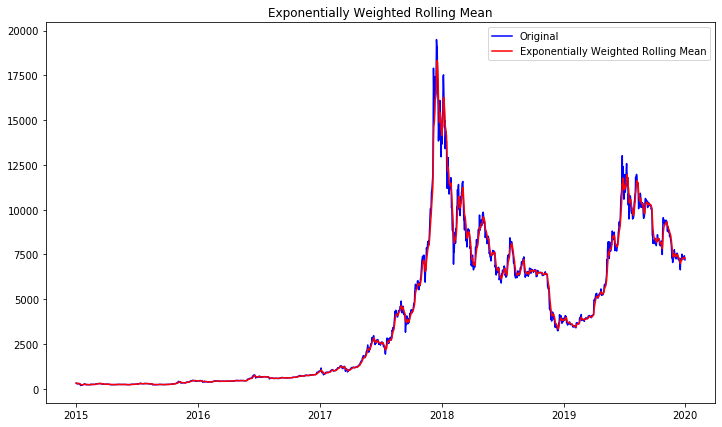

In [35]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =2
exp_roll_mean = df.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean')
plt.show(block=False)

In [36]:
# Subtract the moving average from the original data        Halflife=2
df_minus_exp_roll_mean = df - exp_roll_mean  
df_minus_exp_roll_mean.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,0.000000
2015-01-02,0.324338
2015-01-03,-18.390492
2015-01-04,-21.500770
2015-01-05,-7.229201


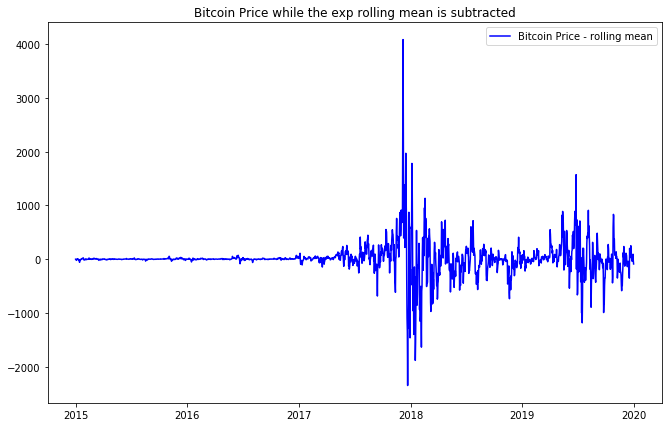

In [37]:
fig = plt.figure(figsize=(11,7))                          #Halflife=2
plt.plot(df_minus_exp_roll_mean, color='blue',label='Bitcoin Price - rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted')
plt.show(block=False)

Exp rolling mean with halflife=2, similiar to regular rolling mean

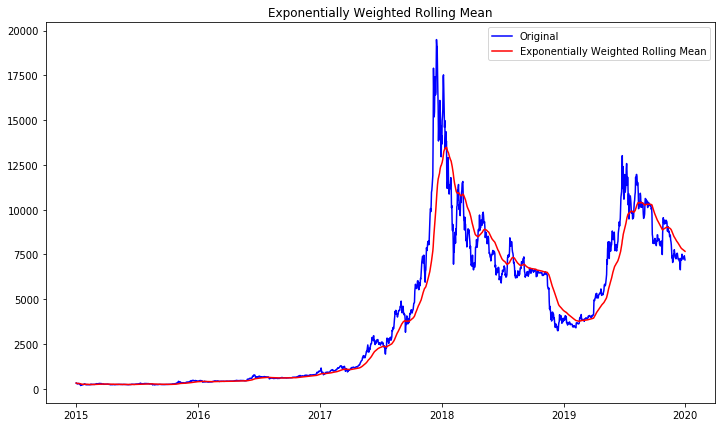

In [38]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =20
exp_roll_mean_20 = df.ewm(halflife=20).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean_20, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean')
plt.show(block=False)

In [39]:
# Subtract the moving average from the original data        Halflife=20
df_minus_exp_roll_mean_20 = df - exp_roll_mean_20
df_minus_exp_roll_mean_20.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,0.000000
2015-01-02,0.384726
2015-01-03,-21.986934
2015-01-04,-28.644538
2015-01-05,-14.433530


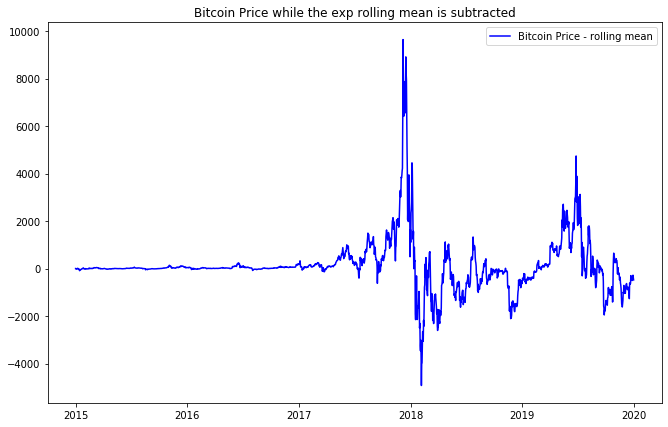

In [40]:
fig = plt.figure(figsize=(11,7))                            #Halflife=20
plt.plot(df_minus_exp_roll_mean_20, color='blue',label='Bitcoin Price - rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted')
plt.show(block=False)

Exp rolling mean with halflife=20 is **not** as good as Exp rolling mean with halflife=2

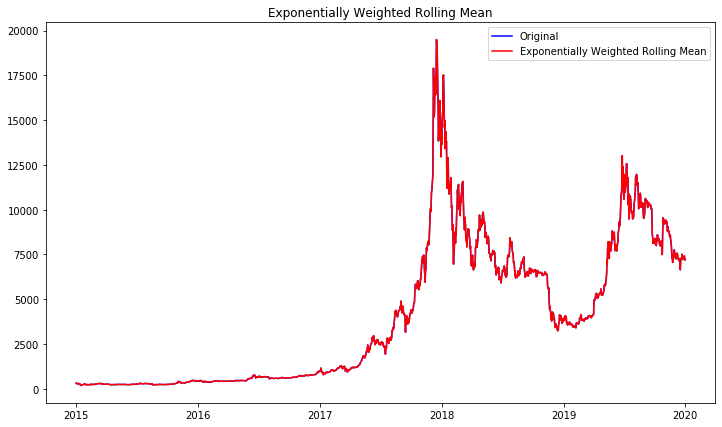

In [41]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =.05
exp_roll_mean_05 = df.ewm(halflife=.05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean_05, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean')
plt.show(block=False)

In [42]:
# Subtract the moving average from the original data        #Halflife=.05
df_minus_exp_roll_mean_05 = df - exp_roll_mean_05
df_minus_exp_roll_mean_05.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,0.000000e+00
2015-01-02,7.467453e-07
2015-01-03,-3.237725e-05
2015-01-04,-1.610472e-05
2015-01-05,9.802795e-06


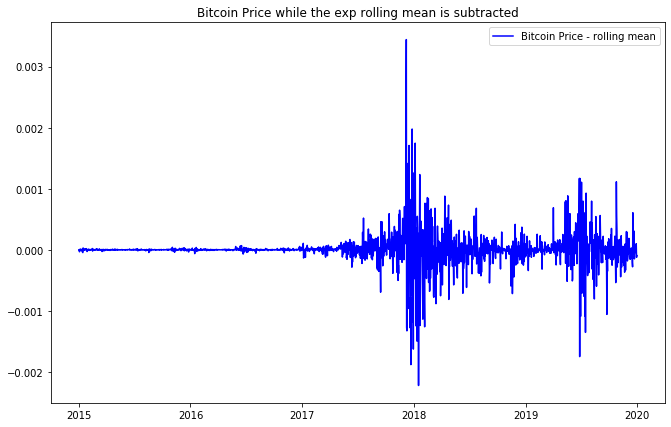

In [43]:
fig = plt.figure(figsize=(11,7))                          #Halflife=.05
plt.plot(df_minus_exp_roll_mean_05, color='blue',label='Bitcoin Price - rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted')
plt.show(block=False)

Halflife=.05, Smaller halflife reduces volitility

In [44]:
dftest_minus_exp_roll_mean_05 = adfuller(df_minus_exp_roll_mean_05)          #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput_minus_exp_roll_mean_05 = pd.Series(dftest_minus_exp_roll_mean_05[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_minus_exp_roll_mean_05[4].items():
    dfoutput_minus_exp_roll_mean_05['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_minus_exp_roll_mean_05)

Results of Dickey-Fuller test: 

Test Statistic                -8.334606e+00
p-value                        3.298138e-13
#Lags Used                     1.900000e+01
Number of Observations Used    1.806000e+03
Critical Value (1%)           -3.433976e+00
Critical Value (5%)           -2.863142e+00
Critical Value (10%)          -2.567623e+00
dtype: float64


It doesn't look like there is homoscedasticity, but the p-value is less than .05, same result as using minus rolling average

# Differencing

In [45]:
df_diff = df.diff(periods=1)
df_diff.head()

,Daily_Bitcoin_Price
Date,
2015-01-01,NaN
2015-01-02,0.783020
2015-01-03,-33.950012
2015-01-04,-16.886993
2015-01-05,10.278992


In [46]:
df_diff.dropna(inplace=True)
df_diff.head()

,Daily_Bitcoin_Price
Date,
2015-01-02,0.783020
2015-01-03,-33.950012
2015-01-04,-16.886993
2015-01-05,10.278992
2015-01-06,11.714996


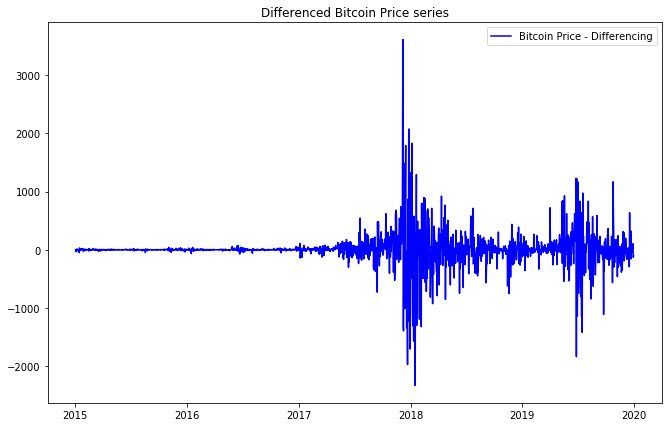

In [47]:
fig = plt.figure(figsize=(11,7))
plt.plot(df_diff, color='blue',label='Bitcoin Price - Differencing')
plt.legend(loc='best')
plt.title('Differenced Bitcoin Price series')
plt.show(block=False)

In [48]:
dftest_diff = adfuller(df_diff)          #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput_diff = pd.Series(dftest_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_diff[4].items():
    dfoutput_diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_diff)

Results of Dickey-Fuller test: 

Test Statistic                -8.332053e+00
p-value                        3.348041e-13
#Lags Used                     1.900000e+01
Number of Observations Used    1.805000e+03
Critical Value (1%)           -3.433978e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567623e+00
dtype: float64


It doesn't look like there is homoscedasticity, but the p-value is less than .05, same result as using minus rolling average and minus exp rolling mean

# Log transformations and Subtracting the Exponential Mean

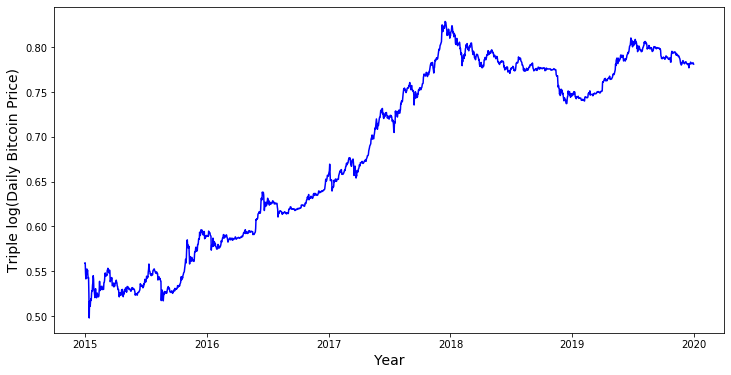

In [49]:
df_log3 = pd.Series(np.log(np.log(np.log(df['Daily_Bitcoin_Price']))))    #taking 3 logs to create stationary data
fig = plt.figure(figsize=(12,6))                                          #This code + graph copied from above
plt.plot(df_log3, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Triple log(Daily Bitcoin Price)', fontsize=14)
plt.show()

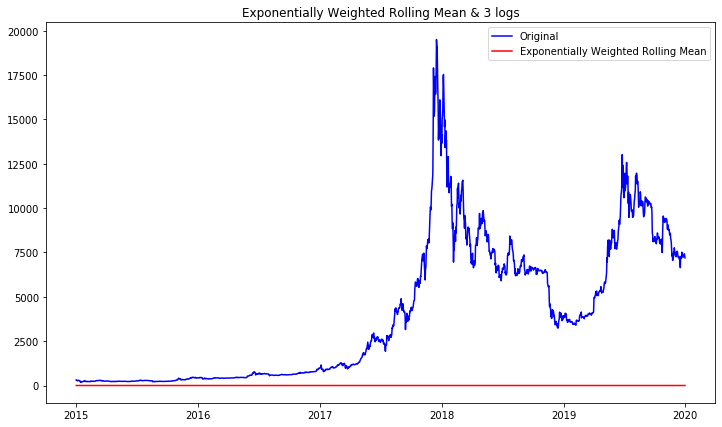

In [50]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =.05 + 3 log transformations
exp_roll_mean_05_log3 = df_log3.ewm(halflife=.05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean_05_log3, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & 3 logs')
plt.show(block=False)

In [51]:
# Subtract the moving average from the data with 3 log transformations      #Halflife=.05 + 3 log transformations
df_minus_exp_roll_mean_05_log3 = df_log3 - exp_roll_mean_05_log3
df_minus_exp_roll_mean_05_log3.head()

Date
2015-01-01    0.000000e+00
2015-01-02    2.358745e-10
2015-01-03   -1.097547e-08
2015-01-04   -6.111688e-09
2015-01-05    3.777621e-09
Name: Daily_Bitcoin_Price, dtype: float64

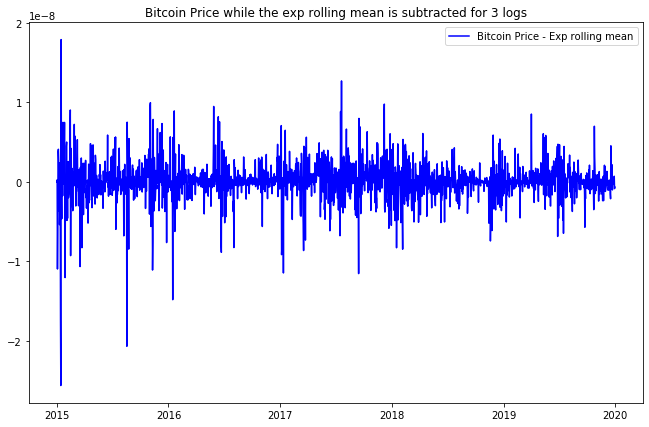

In [52]:
fig = plt.figure(figsize=(11,7))                          #Halflife=.05 + 3 log transformations
plt.plot(df_minus_exp_roll_mean_05_log3, color='blue',label='Bitcoin Price - Exp rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted for 3 logs')
plt.show(block=False)

This data still has heteroscedasticity. Let's see if using only 2 log transformations can reduce heteroscedasticity

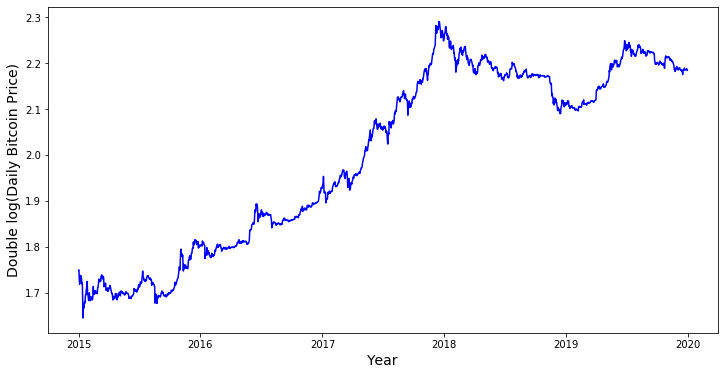

In [53]:
df_log2 = pd.Series(np.log(np.log(df['Daily_Bitcoin_Price'])))     #taking 2 logs to create stationary data
fig = plt.figure(figsize=(12,6))                                    #code + graph copied from above
plt.plot(df_log2, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Double log(Daily Bitcoin Price)', fontsize=14)
plt.show()

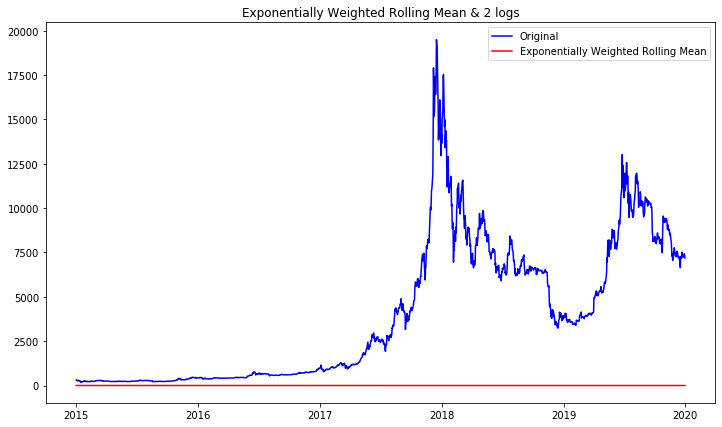

In [54]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =.05 + 2 log transformations
exp_roll_mean_05_log2 = df_log2.ewm(halflife=.05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean_05_log2, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & 2 logs')
plt.show(block=False)

In [55]:
# Subtract the moving average from the data with 3 log transformations      #Halflife=.05 + 2 log transformations
df_minus_exp_roll_mean_05_log2 = df_log2 - exp_roll_mean_05_log2
df_minus_exp_roll_mean_05_log2.head()

Date
2015-01-01    0.000000e+00
2015-01-02    4.126506e-10
2015-01-03   -1.909331e-08
2015-01-04   -1.053725e-08
2015-01-05    6.505075e-09
Name: Daily_Bitcoin_Price, dtype: float64

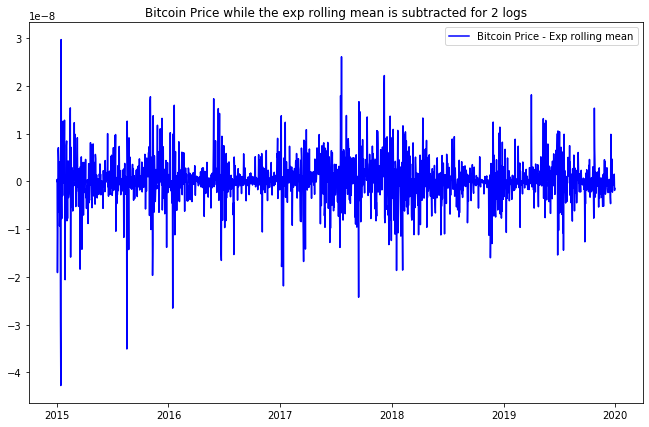

In [56]:
fig = plt.figure(figsize=(11,7))                          #Halflife=.05 + 2 log transformations
plt.plot(df_minus_exp_roll_mean_05_log2, color='blue',label='Bitcoin Price - Exp rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted for 2 logs')
plt.show(block=False)

In [57]:
dftest_minus_exp_roll_mean_05_log2 = adfuller(df_minus_exp_roll_mean_05_log2)          #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput_minus_exp_roll_mean_05_log2 = pd.Series(dftest_minus_exp_roll_mean_05_log2[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_minus_exp_roll_mean_05_log2[4].items():
    dfoutput_minus_exp_roll_mean_05_log2['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput_minus_exp_roll_mean_05_log2)

Results of Dickey-Fuller test: 

Test Statistic                -1.319181e+01
p-value                        1.140083e-24
#Lags Used                     9.000000e+00
Number of Observations Used    1.816000e+03
Critical Value (1%)           -3.433956e+00
Critical Value (5%)           -2.863133e+00
Critical Value (10%)          -2.567618e+00
dtype: float64


This is the best result so far from the Dickey_Fuller test

# Log transformations, Roots and Subtracting the Exponential Mean

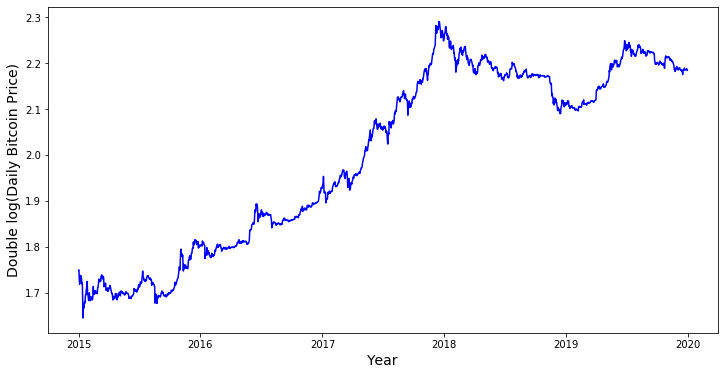

In [58]:
df_log2 = pd.Series(np.log(np.log(df['Daily_Bitcoin_Price'])))     #taking 2 logs to create stationary data
fig = plt.figure(figsize=(12,6))                                   #this code + graph copied from above
plt.plot(df_log2, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Double log(Daily Bitcoin Price)', fontsize=14)
plt.show()

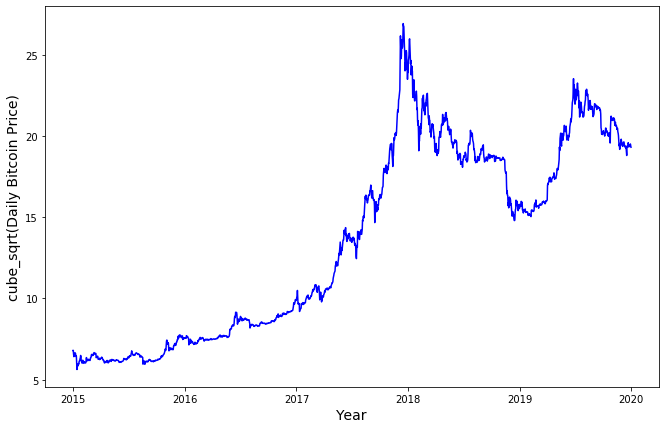

In [59]:
df_cbrt = pd.Series(np.cbrt(df['Daily_Bitcoin_Price']))    #cube_root 
fig = plt.figure(figsize=(11,7))                           #This code + graph copied from above 
plt.plot(df_cbrt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('cube_sqrt(Daily Bitcoin Price)', fontsize=14)
plt.show()

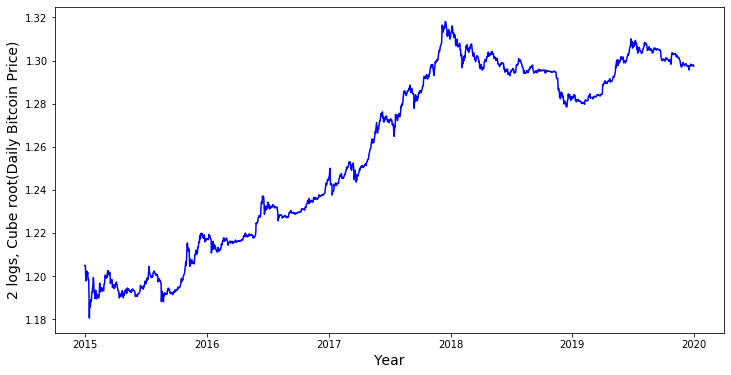

In [60]:
df_log2_cbrt = pd.Series(np.cbrt(np.log(np.log(df['Daily_Bitcoin_Price']))))
fig = plt.figure(figsize=(12,6))                                          # 2 logs + cube root
plt.plot(df_log2_cbrt, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('2 logs, Cube root(Daily Bitcoin Price)', fontsize=14)
plt.show()

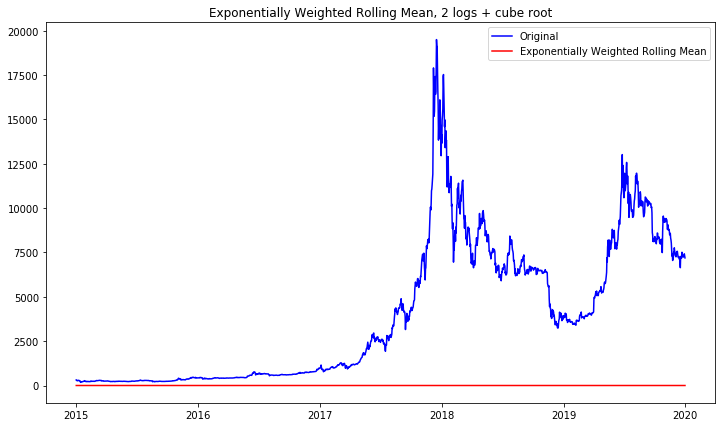

In [61]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average         #halflife =.05 + 2 logs + cubed root
exp_roll_mean_05_log2_cbrt = df_log2_cbrt.ewm(halflife=.05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(exp_roll_mean_05_log2_cbrt, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean, 2 logs + cube root')
plt.show(block=False)

In [62]:
# Subtract the moving average from the data with 2 logs and cube root      
df_minus_exp_roll_mean_05_log2_cbrt = df_log2_cbrt - exp_roll_mean_05_log2_cbrt
df_minus_exp_roll_mean_05_log2_cbrt.head()

Date
2015-01-01    0.000000e+00
2015-01-02    9.473866e-11
2015-01-03   -4.400014e-09
2015-01-04   -2.442840e-09
2015-01-05    1.509298e-09
Name: Daily_Bitcoin_Price, dtype: float64

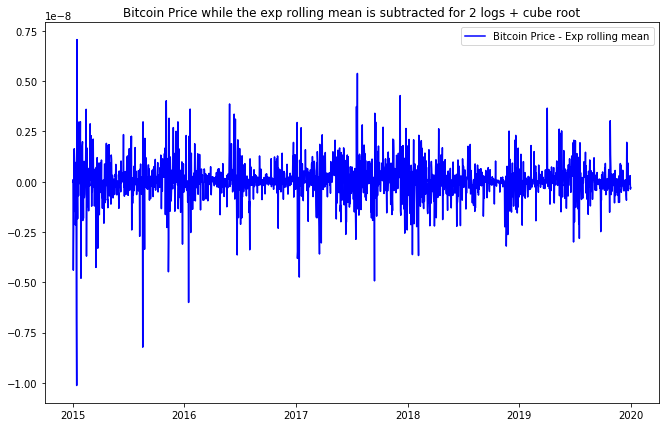

In [63]:
fig = plt.figure(figsize=(11,7))                          #Halflife=.05 + 2 logs + cube root
plt.plot(df_minus_exp_roll_mean_05_log2_cbrt, color='blue',label='Bitcoin Price - Exp rolling mean')
plt.legend(loc='best')
plt.title('Bitcoin Price while the exp rolling mean is subtracted for 2 logs + cube root')
plt.show(block=False)

# Testing for Stationarity

In [64]:
roll_mean = df_minus_exp_roll_mean_05_log2_cbrt.rolling(window=8, center=False).mean()
roll_std = df_minus_exp_roll_mean_05_log2_cbrt.rolling(window=8, center=False).std()

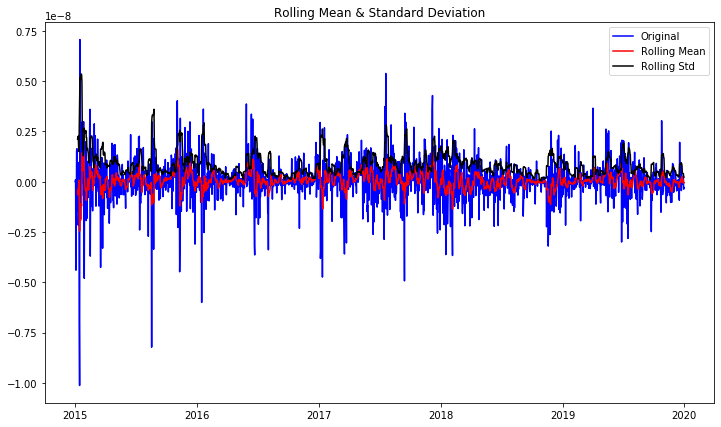

In [65]:
fig = plt.figure(figsize=(12,7))                             #Rolling Statistics
plt.plot(df_minus_exp_roll_mean_05_log2_cbrt, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [66]:
dftest = adfuller(df_minus_exp_roll_mean_05_log2_cbrt)   #The Dickey-Fuller Test

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -1.333996e+01
p-value                        5.947374e-25
#Lags Used                     9.000000e+00
Number of Observations Used    1.816000e+03
Critical Value (1%)           -3.433956e+00
Critical Value (5%)           -2.863133e+00
Critical Value (10%)          -2.567618e+00
dtype: float64


This is the Dickey-Fuller test with the lowest p-value, so we can reject the null hypothesis; the data is stationary.
This data visually has the most homoscedasticity

# Autocorrelation Function

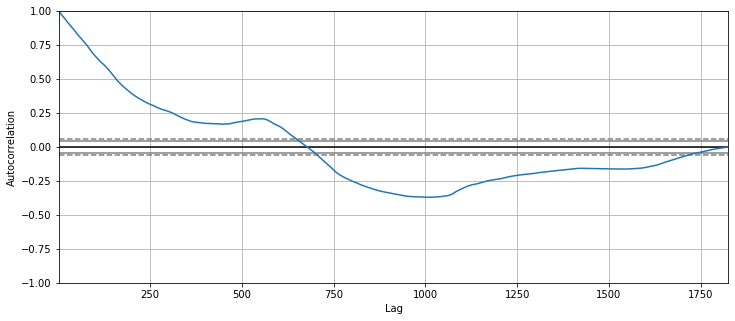

In [67]:
plt.figure(figsize=(12,5))        #original Bitcoin Prices, pandas version
pd.plotting.autocorrelation_plot(df)

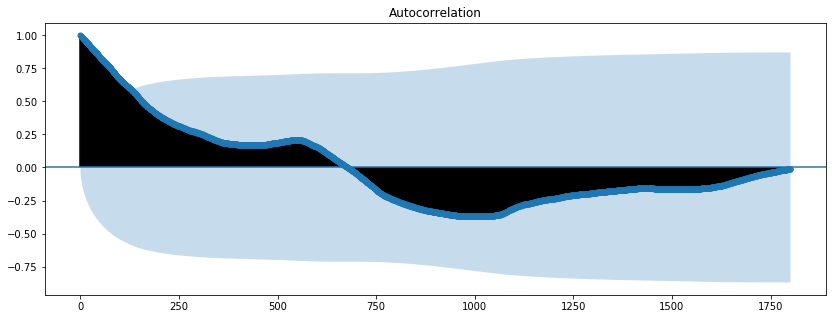

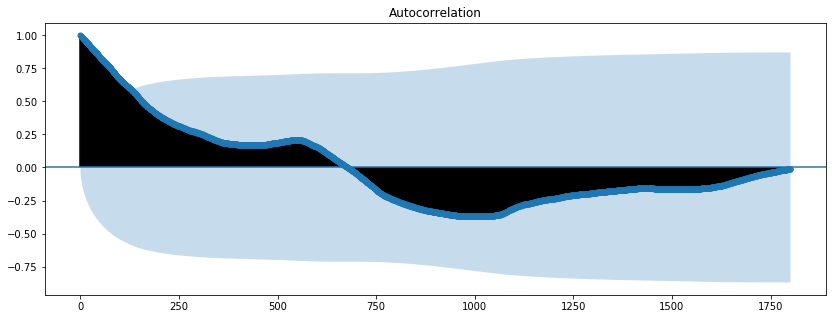

In [68]:
from statsmodels.graphics.tsaplots import plot_acf       #original Bitcoin Prices, statsmodels version
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df, lags=1800)

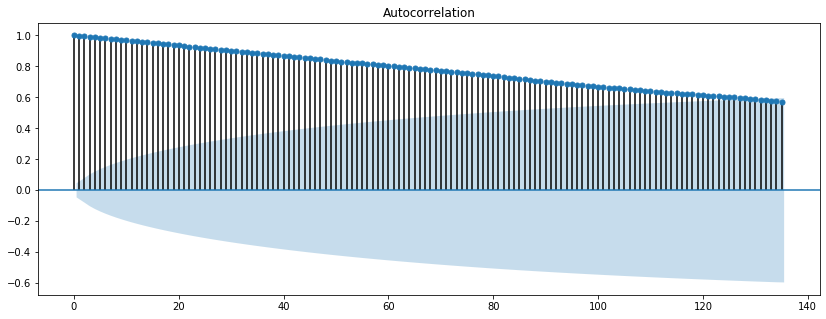

In [69]:
rcParams['figure.figsize'] = 14, 5  #original Bitcoin Prices, statsmodels version, first 153 lags are auto correlated

plot_acf(df, lags=135);

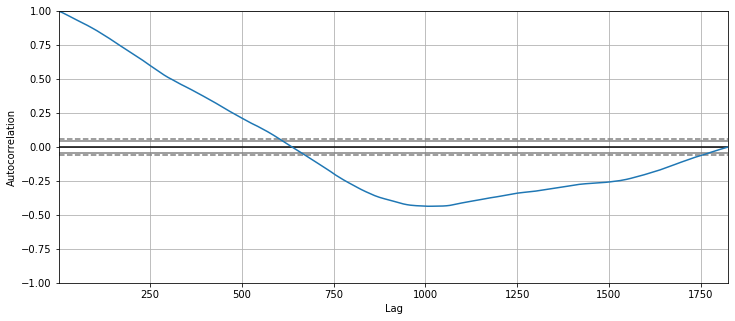

In [70]:
plt.figure(figsize=(12,5))                   #Bitcoin Prices with 3 log transformations, pandas version
pd.plotting.autocorrelation_plot(df_log3)

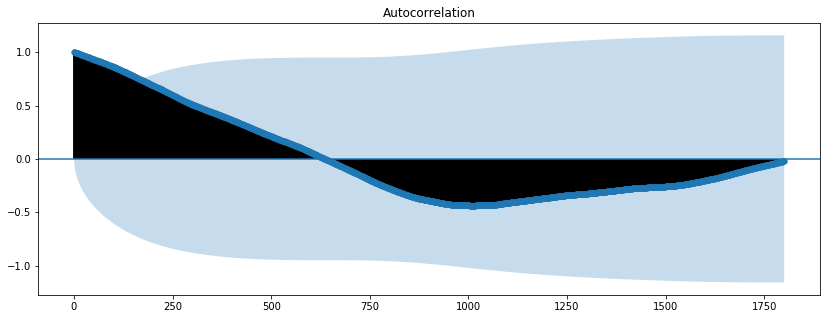

In [71]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices with 3 log transformations, statsmodels version

plot_acf(df_log3, lags=1800);

Original Bitcoin prices and Bitcoin prices with 3 log transformations have autocorrelation with more recent periods

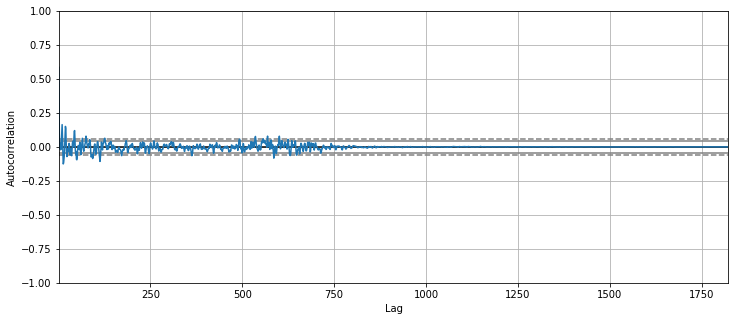

In [72]:
plt.figure(figsize=(12,5))                      #Bitcoin Prices subtracted by rolling mean, pandas version
pd.plotting.autocorrelation_plot(df_minus_roll_mean)

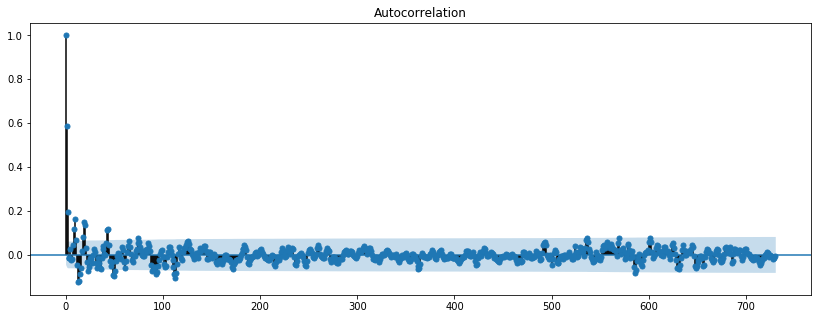

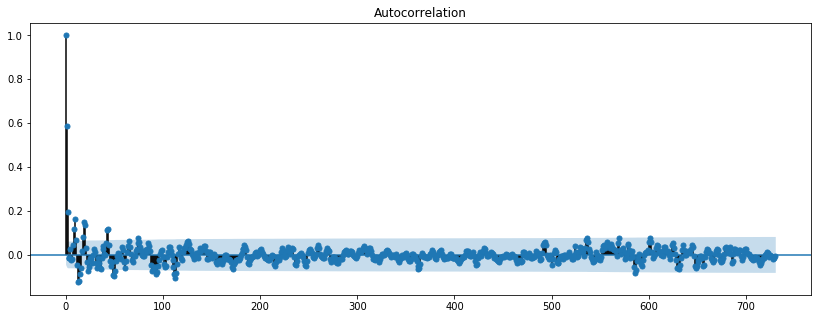

In [73]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted by rolling mean, statsmodels version

plot_acf(df_minus_roll_mean, lags=730)

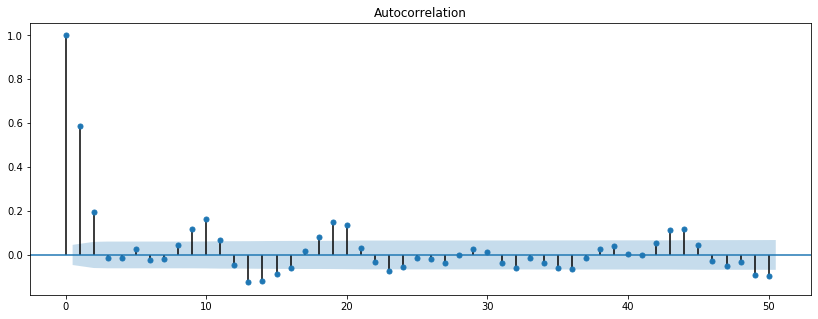

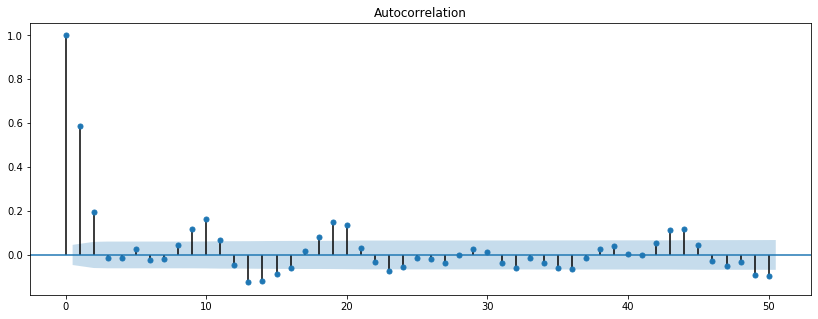

In [74]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted by rolling mean, statsmodels version, 
                                         #1st and 2nd lags are autocorrelated
plot_acf(df_minus_roll_mean, lags=50)

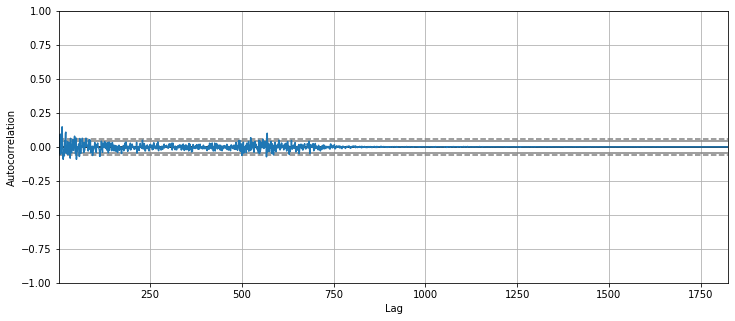

In [75]:
plt.figure(figsize=(12,5))                        #Bitcoin Prices subtracted by exp rolling mean, pandas version
pd.plotting.autocorrelation_plot(df_minus_exp_roll_mean_05)

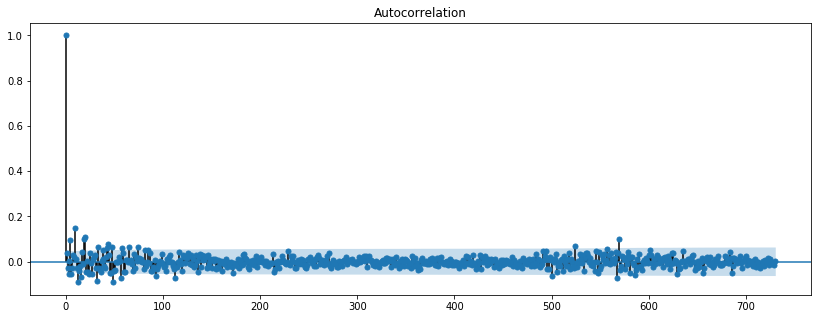

In [76]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted by exp rolling mean, statsmodels version

plot_acf(df_minus_exp_roll_mean_05, lags=730);

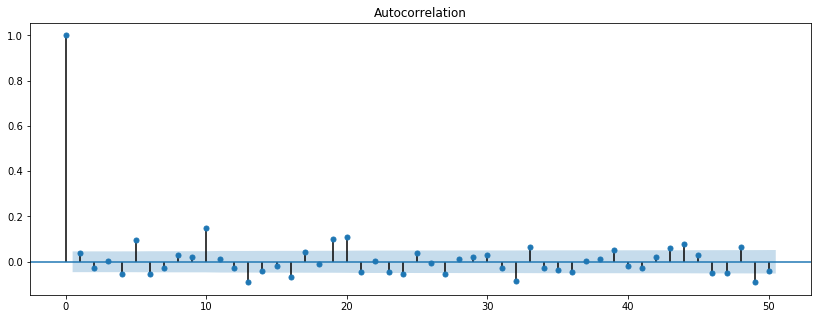

In [77]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted by exp rolling mean, statsmodels version

plot_acf(df_minus_exp_roll_mean_05, lags=50);

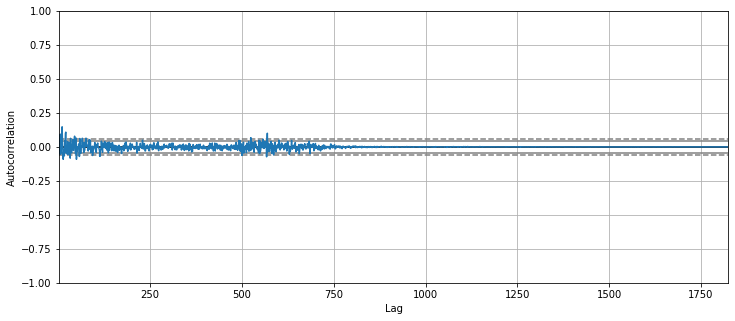

In [78]:
plt.figure(figsize=(12,5))          #Bitcoin Prices subtracted 1 period lag, pandas version
pd.plotting.autocorrelation_plot(df_diff)

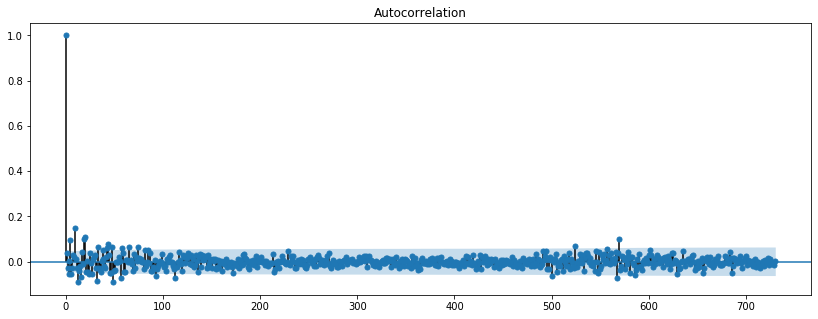

In [79]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted 1 period lag, statsmodels version

plot_acf(df_diff, lags=730);

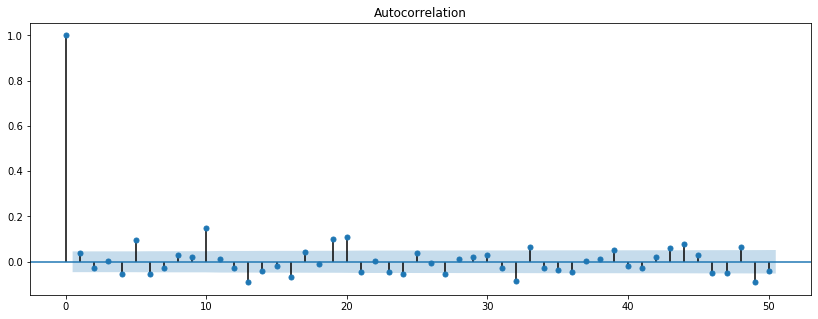

In [80]:
rcParams['figure.figsize'] = 14, 5      #Bitcoin Prices subtracted 1 period lag, statsmodels version

plot_acf(df_diff, lags=50);

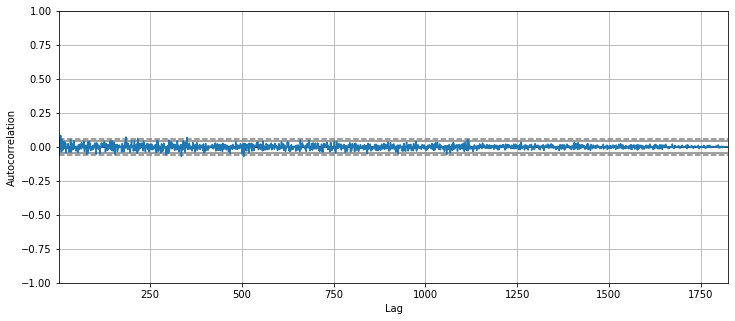

In [81]:
plt.figure(figsize=(12,5))          #Bitcoin Prices with 2 log tranformations + cubed, subtracted by exp rolling mean
pd.plotting.autocorrelation_plot(df_minus_exp_roll_mean_05_log2_cbrt)     #pandas version

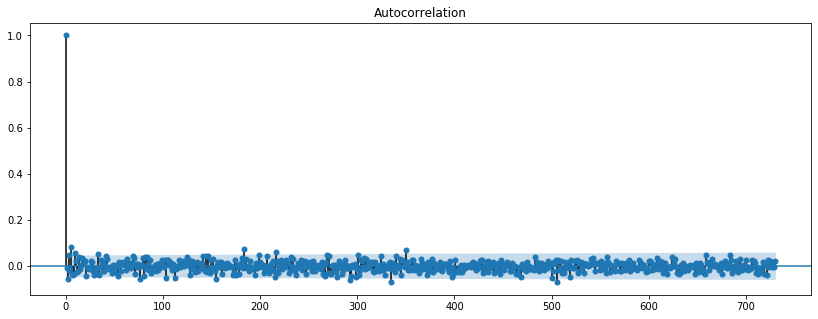

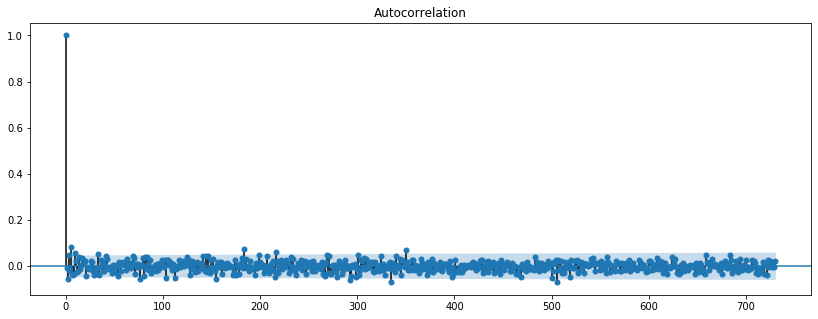

In [82]:
rcParams['figure.figsize'] = 14, 5 #Bitcoin Prices with 2 log tranformations + cubed, subtracted by exp rolling mean

plot_acf(df_minus_exp_roll_mean_05_log2_cbrt, lags=730)    #statsmodels version

The last 4 sets of data have only minor statistically significant autocorrelation with recent periods

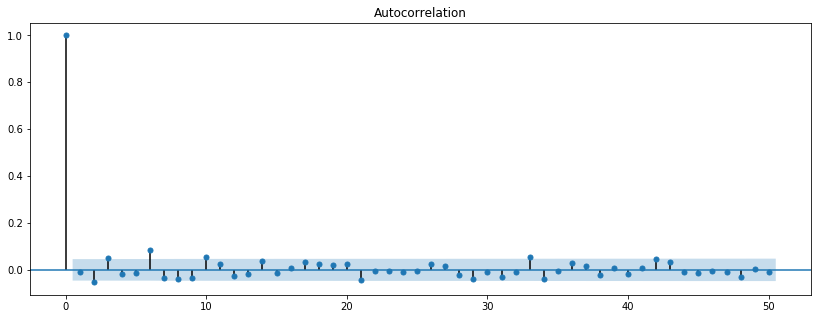

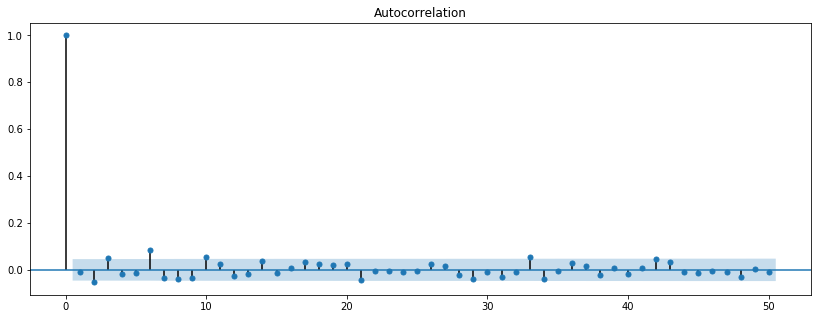

In [83]:
rcParams['figure.figsize'] = 14, 5 #Bitcoin Prices with 2 log tranformations + cubed, subtracted by exp rolling mean

plot_acf(df_minus_exp_roll_mean_05_log2_cbrt, lags=50)    #statsmodels version

# Partial Autocorrelation Function

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


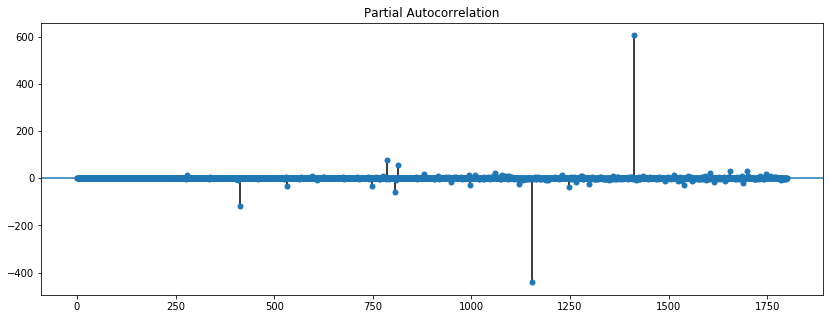

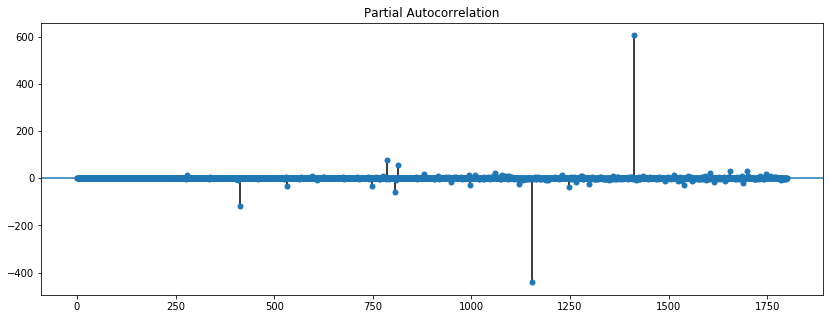

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf   #Original Bitcoin Prices; 1,800 lags
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df, lags=1800)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


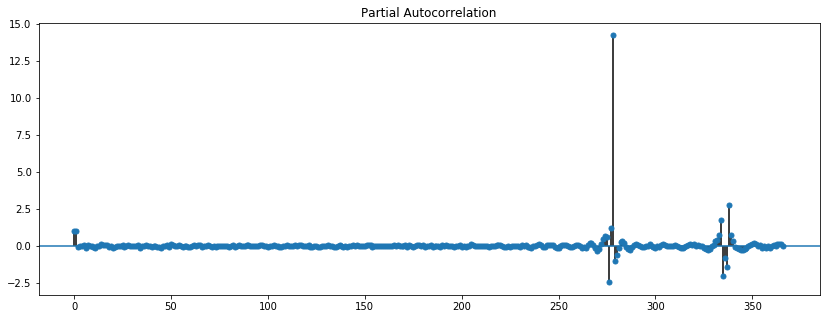

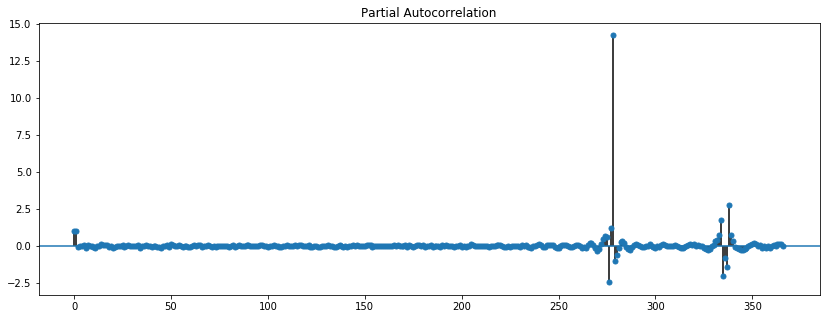

In [85]:
rcParams['figure.figsize'] = 14, 5        #Original Bitcoin Prices; 366 lags

plot_pacf(df, lags=366)

1,800 lags and 366 lags do not seem to be very helpful

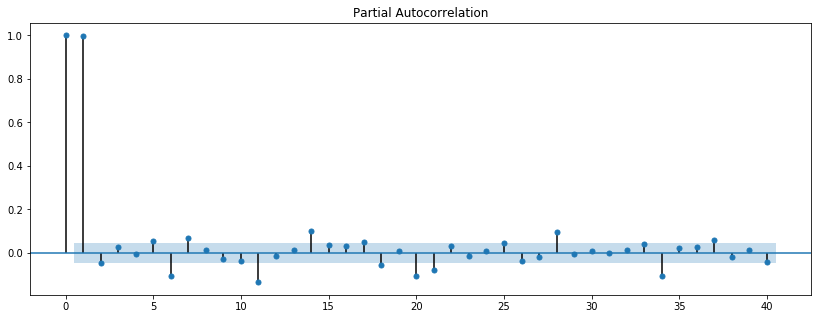

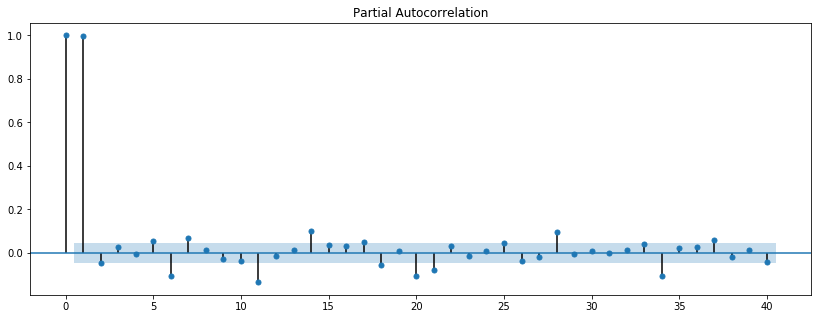

In [86]:
rcParams['figure.figsize'] = 14, 5        #Original Bitcoin Prices; 40 lags

plot_pacf(df, lags=40)

1st lag term has high autocorrelation

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


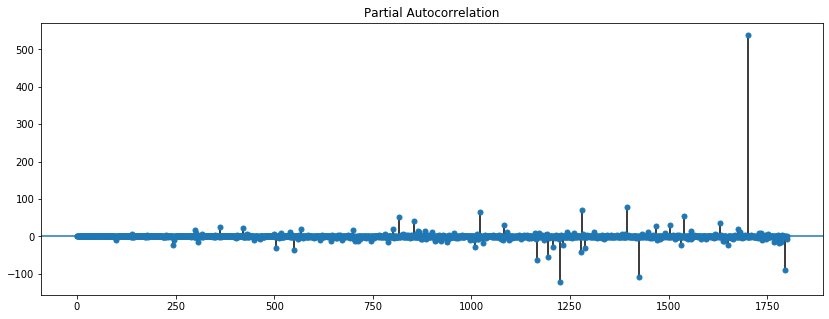

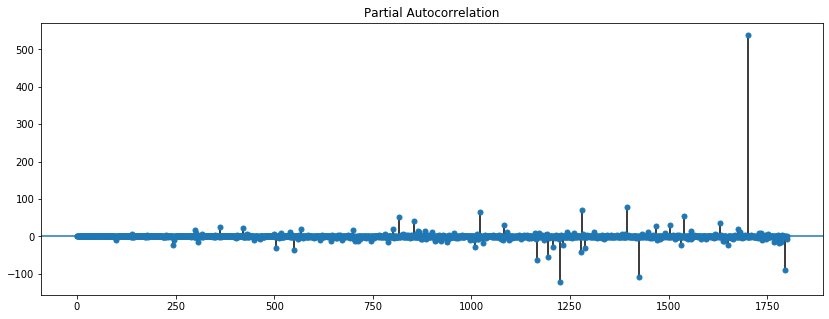

In [87]:
rcParams['figure.figsize'] = 14, 5            #Bitcoin Prices 3 log transformations; 1,800 lags

plot_pacf(df_log3, lags=1800)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


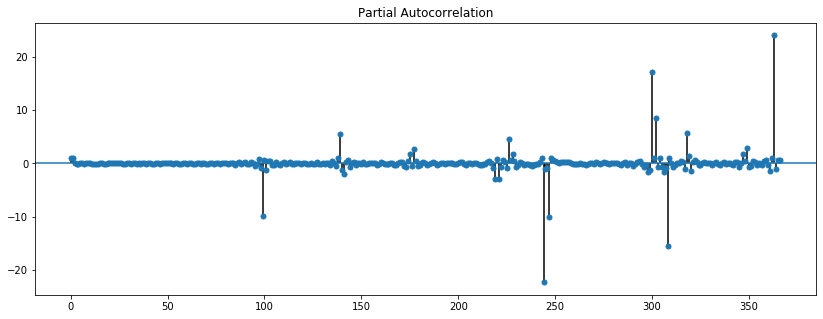

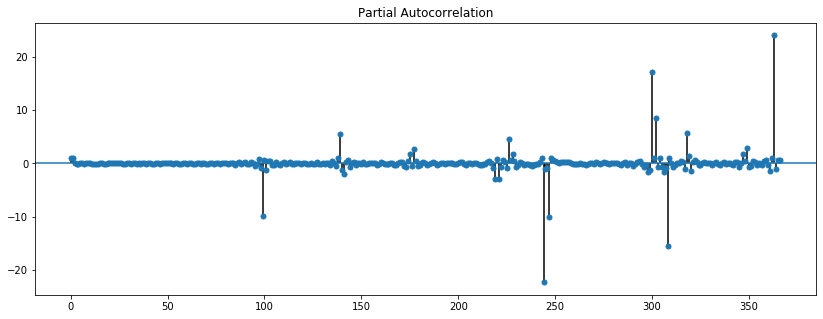

In [88]:
rcParams['figure.figsize'] = 14, 5             #Bitcoin Prices 3 log transformations; 366 lags

plot_pacf(df_log3, lags=366)

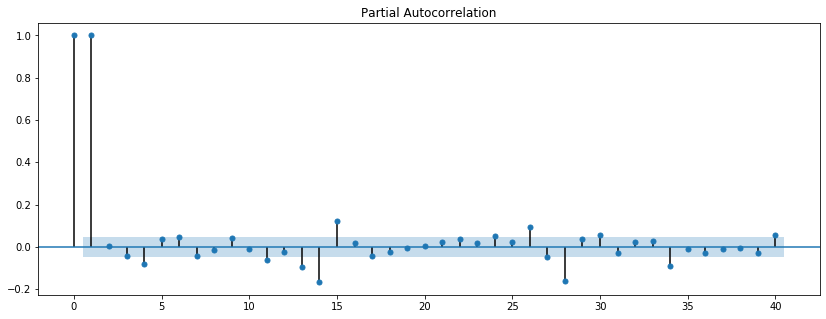

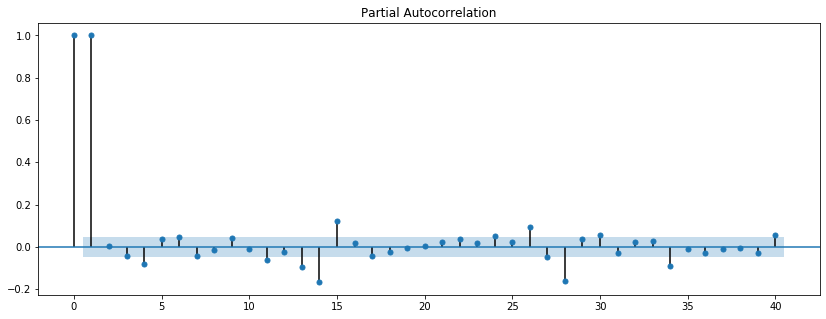

In [89]:
rcParams['figure.figsize'] = 14, 5        #Bitcoin Prices 3 log transformations; 40 lags

plot_pacf(df_log3, lags=40)

1st lag term has high autocorrelation

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


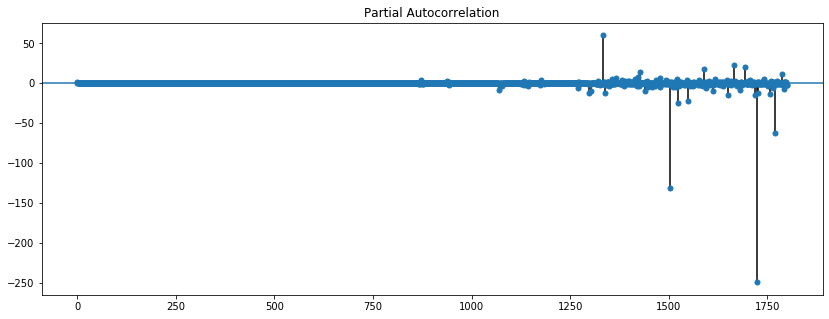

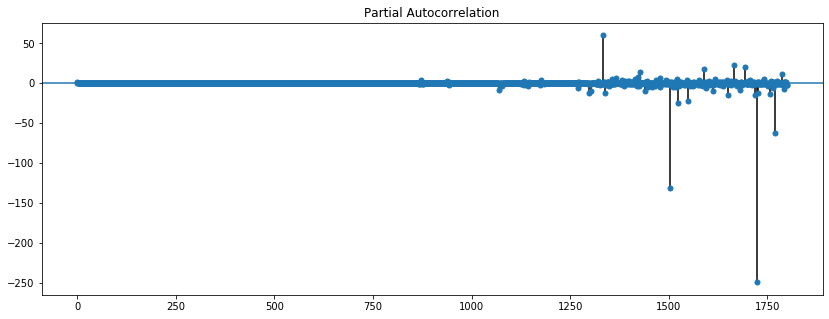

In [90]:
rcParams['figure.figsize'] = 14, 5                 #Bitcoin Prices minus rolling mean; 1,800 lags

plot_pacf(df_minus_roll_mean, lags=1800)

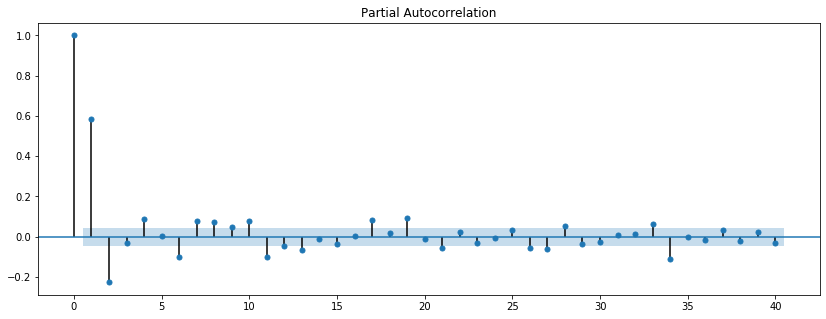

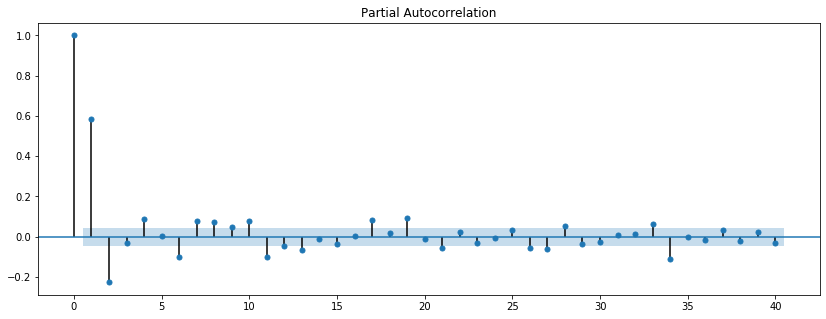

In [91]:
rcParams['figure.figsize'] = 14, 5                 #Bitcoin Prices minus rolling mean; 40 lags

plot_pacf(df_minus_roll_mean, lags=40)

1st lag term has some positive autocorrelation, 2nd lag term has some negative autocorrelation

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


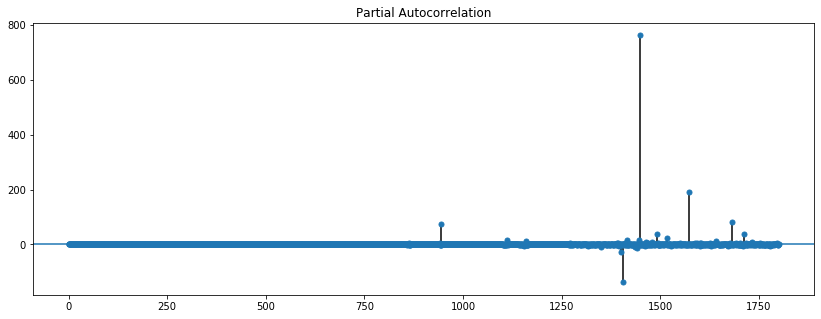

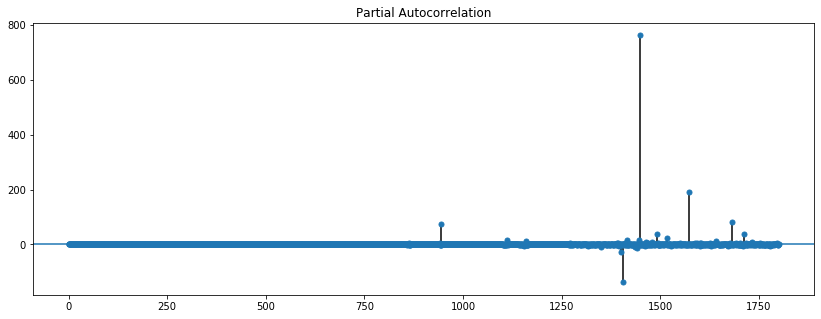

In [92]:
rcParams['figure.figsize'] = 14, 5               #Bitcoin Prices minus exp rolling mean; 1,800 lags

plot_pacf(df_minus_exp_roll_mean_05, lags=1800)

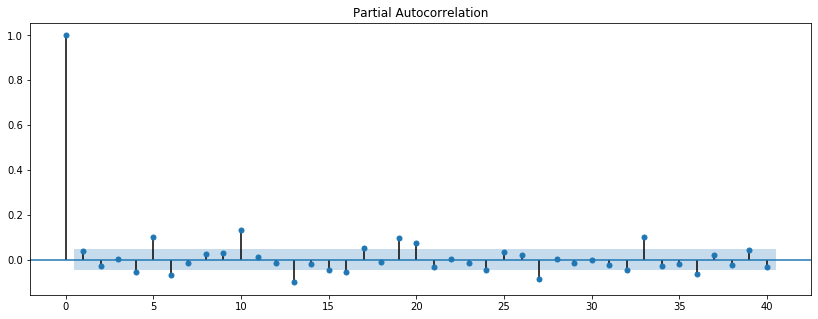

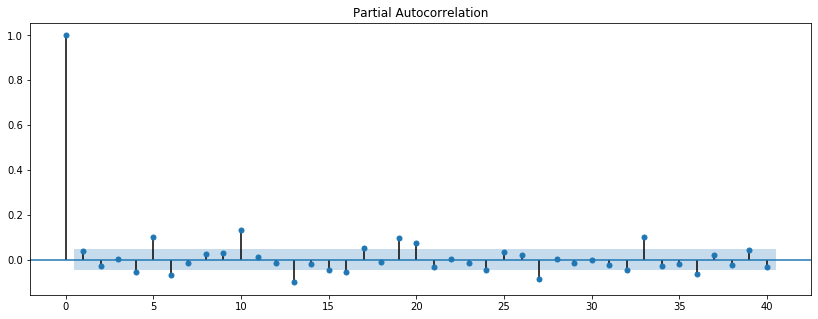

In [93]:
rcParams['figure.figsize'] = 14, 5               #Bitcoin Prices minus exp rolling mean; 40 lags

plot_pacf(df_minus_exp_roll_mean_05, lags=40)

No meaningful autocorrelation

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


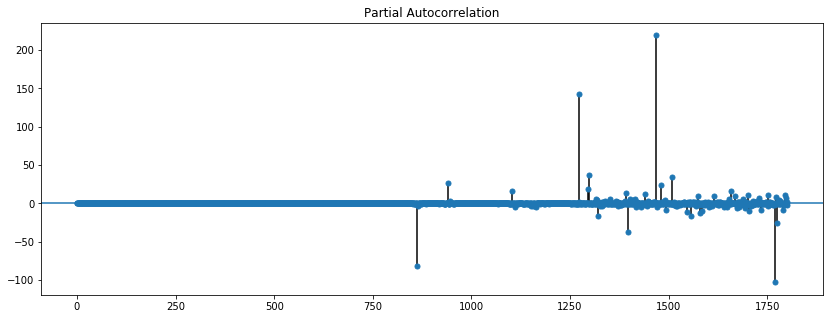

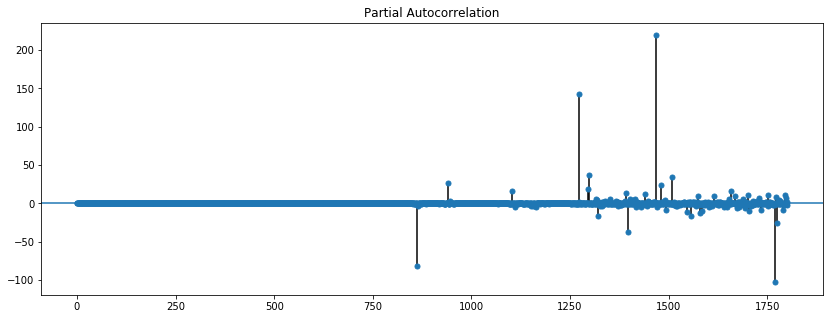

In [94]:
rcParams['figure.figsize'] = 14, 5        #Bitcoin Prices minus 1 lag; 1,800 lags

plot_pacf(df_diff, lags=1800)

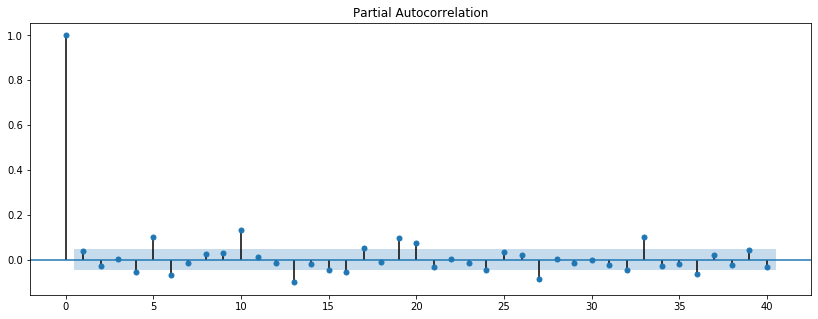

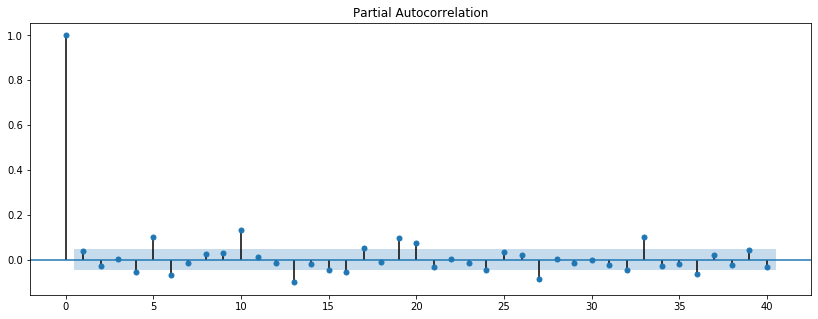

In [95]:
rcParams['figure.figsize'] = 14, 5        #Bitcoin Prices minus 1 lag; 40 lags

plot_pacf(df_diff, lags=40)

No meaningful autocorrelation

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


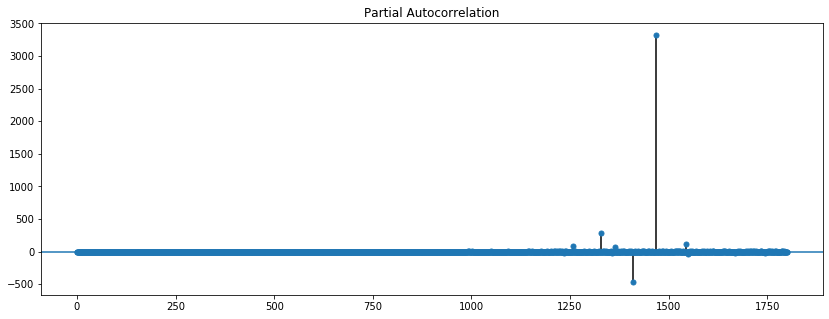

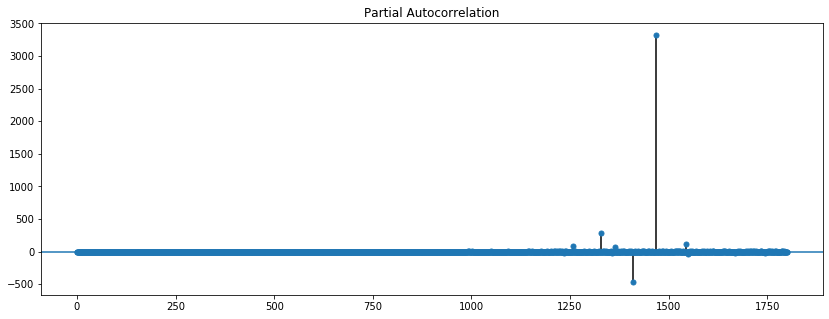

In [96]:
rcParams['figure.figsize'] = 14, 5             #Bitcoin Prices 3 logs, cubed minus exp rolling mean; 1,800 lags

plot_pacf(df_minus_exp_roll_mean_05_log2_cbrt, lags=1800)

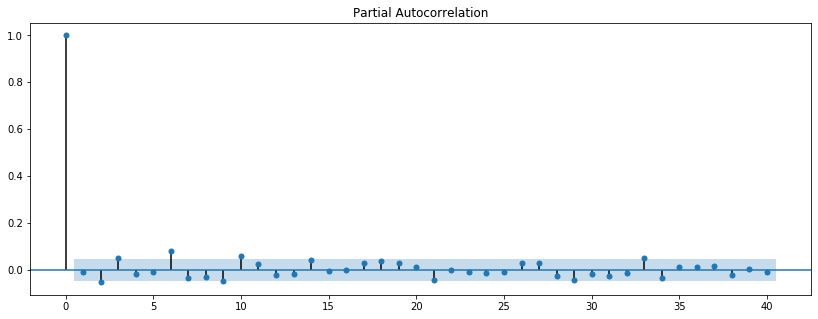

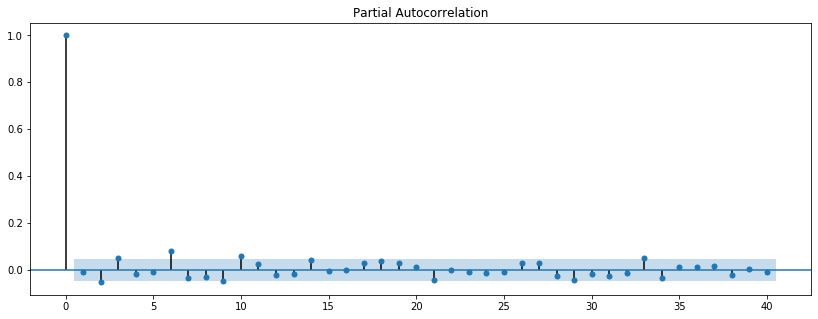

In [97]:
rcParams['figure.figsize'] = 14, 5             #Bitcoin Prices 3 logs, cubed minus exp rolling mean; 40 lags

plot_pacf(df_minus_exp_roll_mean_05_log2_cbrt, lags=40)

No meaningful autocorrelation

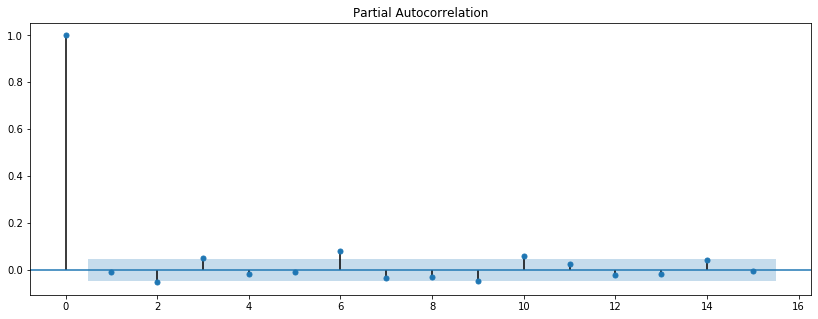

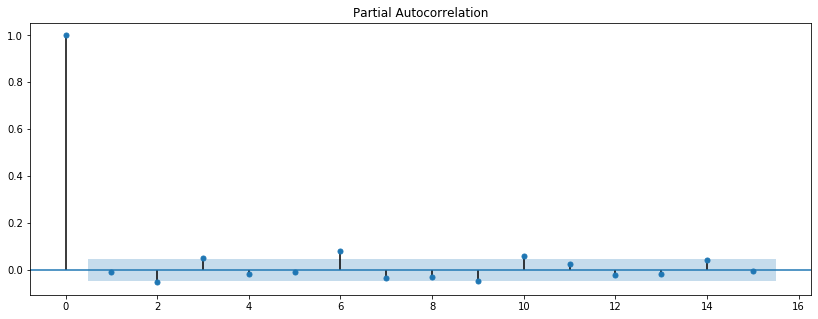

In [98]:
rcParams['figure.figsize'] = 14, 5             #Bitcoin Prices 3 logs, cubed minus exp rolling mean; 15 lags

plot_pacf(df_minus_exp_roll_mean_05_log2_cbrt, lags=15)

No meaningful autocorrelation

# FB Prophet experimenting 

In [105]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [106]:
fb10 = df.copy()
fb10.reset_index(level=0, inplace=True)
fb10.columns = ['ds', 'y']
fb10.head()

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999


In [107]:
fb10_train = fb10[:int(0.8*(len(fb10)))]        #split into train and validation set
fb10_valid = fb10[int(0.8*(len(fb10))):]

In [108]:
Model10 = Prophet(interval_width=0.95) 
FB10 = Model10.fit(fb10_train)
validation_dates10 = Model10.make_future_dataframe(periods=(366), freq='D')
fb10_prediction = Model10.predict(validation_dates10)
fb11 =fb10_prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
fb11.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat_lower,yhat_upper,yhat
0,2015-01-01,-387.582174,3025.198760,1312.793594
1,2015-01-02,-496.309694,3074.324082,1286.755435
2,2015-01-03,-475.107768,3140.133735,1277.436001
3,2015-01-04,-423.123235,2922.341210,1239.538702
4,2015-01-05,-603.510039,2939.998976,1223.136191


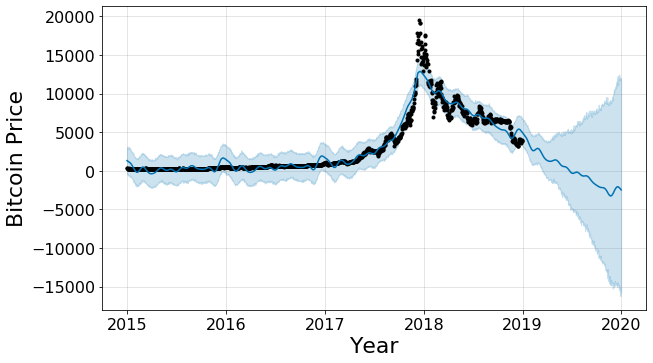

In [109]:
Model10.plot(fb11, xlabel= '', ylabel= '', figsize=(8.5, 4.75))

plt.xlabel('Year', fontsize=22)
plt.ylabel('Bitcoin Price', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
error_fb10 = np.sqrt(mean_squared_error(fb10_valid['y'][1:],fb11['yhat'][1461:]))
error_fb10

8463.704877269038